In [1]:
import pandas as pd
df = pd.read_csv("movie_industry.csv", encoding = "latin1")

In [2]:
df["profit"] = df.apply(lambda row: row['gross'] - row['budget'], axis = 1)

In [3]:
df = df[df["budget"] != 0]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

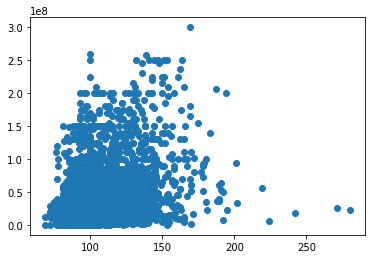

In [5]:
x = df["budget"]
y = df["profit"]
z = df["runtime"]
plt.scatter(z,x)
plt.show()

In [12]:
def ratingplot(rating):
    p = df[df["rating"] == rating]
    x = p["budget"]
    y = p["profit"]
    plt.scatter(x,y)
    plt.show()
    x = np.array(x).reshape(-1,1)
    y = np.array(y)
    model = LinearRegression().fit(x,y)
    print(model.score(x,y))

In [17]:
import datetime
def weeknumber(ymd):
    m = ymd[0:ymd.find("/")]
    d = ymd[ymd.find("/")+1 : ymd.find("/",3)]
    y = ymd[ymd.find("/", 3) + 1:]
    try:
        return datetime.date(int(y), int(m), int(d)).isocalendar()[1]
    except:
        return -1

In [18]:
df["weekrelease"] = df.apply(lambda row: weeknumber(row["released"]), axis = 1)

In [22]:
df = df[df["weekrelease"] != -1]

In [31]:
X = df.drop("profit", axis = 1)
Y = df["profit"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [255]:
ratings = {}
def zscores(name, column):
    if(name in ratings):
        return ratings[name]
    else:
        up = X_train[X_train[column] == name]
        if(len(up) < 2):
            return 0
        mnup = np.mean(up["profit"])
        mnX = np.mean(X_train["profit"])
        std = np.std(X_train["profit"])
        ratings[name] = (mnup - mnX)/std
        return ratings[name]

In [268]:
X_train.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,...,votes,writer,year,weekrelease,rating zscore,genre zscore,weekrelease zscore,company zscore,star zscore,writer zscore
3497,38000000,Fox 2000 Pictures,USA,John Pasquin,Comedy,22770864,Joe Somebody,PG,12/21/01,98,...,8891,John Scott Shepherd,2001,51,0.162876,0.052852,0.662001,0.103152,0.459053,0.000000
5552,6000000,Code Red,USA,Lance Daly,Drama,4106,The Good Doctor,PG-13,8/31/12,91,...,5532,John Enbom,2011,35,0.068269,-0.090725,-0.280831,0.000000,0.000000,0.000000
2535,12000000,Channel Four Films,UK,Danny Boyle,Comedy,4266243,A Life Less Ordinary,R,10/24/97,103,...,31471,John Hodge,1997,43,-0.105197,0.052852,-0.213711,-0.168469,0.045894,-0.354848
4944,40000000,Columbia Pictures,USA,Pete Travis,Crime,72266306,Vantage Point,PG-13,2/22/08,90,...,132882,Barry L. Levy,2008,8,0.068269,-0.122647,-0.259548,0.171537,-0.176736,0.000000
5836,39000000,Walt Disney Pictures,USA,Tim Burton,Animation,35291068,Frankenweenie,PG,10/5/12,87,...,81006,Leonard Ripps,2012,40,0.162876,0.407114,0.013753,0.287071,-0.246018,0.000000


{}

In [74]:
X_train["rating zscore"] = X_train.apply(lambda row: zscores(row["rating"], "rating"), axis = 1)

/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
X_train.insert(12, "profit", y_train, True)

In [77]:
X_test["rating zscore"] = X_test.apply(lambda row: zscores(row["rating"], "rating"), axis = 1)

/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [261]:
X_train1 = X_train[["budget", "genre zscore", "weekrelease zscore", "company zscore", "writer zscore"]]

In [262]:
part1 = X_train1.to_numpy()
part2 = y_train.to_numpy()

In [263]:
test1 = X_test[["budget", "genre zscore", "weekrelease zscore", "company zscore", "writer zscore"]]
test2 = y_test

test1 = test1.to_numpy()
test2 = test2.to_numpy()



In [264]:
model = LinearRegression().fit(part1, part2)

In [266]:
model.score(test1, test2)

0.14990410473465277

In [250]:
predictions = model.predict(part1)

In [252]:
predictions

array([ 37133307.01433666,  -1367479.16404703, -21095552.53739334, ...,
       -32138236.99490932, -12927513.82453316,  19071547.38412618])

In [248]:
X_train["genre zscore"] = X_train.apply(lambda row: zscores(row["genre"], "genre"), axis = 1)
X_test["genre zscore"] = X_test.apply(lambda row: zscores(row["genre"], "genre"), axis = 1)

/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
X_train["weekrelease zscore"] = X_train.apply(lambda row: zscores(row["weekrelease"], "weekrelease"), axis = 1)
X_test["weekrelease zscore"] = X_test.apply(lambda row: zscores(row["weekrelease"], "weekrelease"), axis = 1)

/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [219]:
X_train["company zscore"] = X_train.apply(lambda row: zscores(row["company"], "company"), axis = 1)
X_test["company zscore"] = X_test.apply(lambda row: zscores(row["company"], "company"), axis = 1)

/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [220]:
len(X_train["star"].unique())

1314

In [127]:
X_train["star zscore"] = X_train.apply(lambda row: zscores(row["star"], "star"), axis = 1)
X_test["star zscore"] = X_test.apply(lambda row: zscores(row["star"], "star"), axis = 1)

/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [239]:
X_train["writer zscore"] = X_train.apply(lambda row: zscores(row["writer"], "writer"), axis = 1)
X_test["writer zscore"] = X_test.apply(lambda row: zscores(row["writer"], "writer"), axis = 1)

/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/willieturchetta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train["company"]    

In [ ]:
X_train["profit"]

In [ ]:
companies = np.unique(X_train["company"])

In [ ]:
def probability(row):
    up = df[df["weekrelease"] == row]
    a = len(up)
    b = len(up[up["profit"] > 0])
    if(a < 3):
        return .5
    return b/a

In [ ]:
up = X_train[X_train["company"] == "Universal Pictures"]
len(up)
len(up[up["profit"] > 0])

In [ ]:
probability("Universal Pictures")

In [ ]:
df["company probability"] = df.apply(lambda row: probability(row["company"]), axis = 1)

In [ ]:
df["rating probability"] = df.apply(lambda row: probability(row["rating"]), axis = 1)

In [ ]:
df["genre probability"] = df.apply(lambda row: probability(row["genre"]), axis = 1)

In [ ]:
df["runtime"].describe()

In [ ]:
def bucketrun(time):
    if(time < 96):
        return 0
    elif(time >= 96 and time < 104):
        return 1
    elif(time > 104 and time < 117):
        return 2
    else:
        return 3

In [ ]:
df["bucket runtime"] = df.apply(lambda row: bucketrun(row["runtime"]), axis = 1)

In [ ]:
df["runtime probability"] = df.apply(lambda row: probability(row["bucket runtime"]), axis = 1)

In [ ]:
df.head()

In [ ]:
import datetime
datetime.date(2010, 6, 16).isocalendar()[1]

In [ ]:
def weeknumber(ymd):
    m = ymd[0:ymd.find("/")]
    d = ymd[ymd.find("/")+1 : ymd.find("/",3)]
    y = ymd[ymd.find("/", 3) + 1:]
    try:
        return datetime.date(int(y), int(m), int(d)).isocalendar()[1]
    except:
        return -1

In [ ]:
df["weekrelease"] = df.apply(lambda row: weeknumber(row["released"]), axis = 1)

In [ ]:
df = df[df["weekrelease"] != -1]

In [ ]:
df["weekrelease probability"] = df.apply(lambda row: probability(row["weekrelease"]), axis = 1)

In [ ]:
numbers = df[["budget", "company probability", "rating probability", "genre probability", "runtime probability", "weekrelease probability", "profit"]]

In [ ]:
numbers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [ ]:
X_train

In [ ]:
def probability(row):
    up = X_train[X_train["bucket runtime"] == row]
    a = len(up)
    b = len(up[up["profit"] > 0])
    print(a)
    if(a < 3):
        return .5
    return b/a

In [ ]:
X_train["company probability"] = X_train.apply(lambda row: probability(row["company"]), axis = 1)

In [ ]:
X_train["rating probability"] = X_train.apply(lambda row: probability(row["rating"]), axis = 1)

In [ ]:
X_train["genre probability"] = X_train.apply(lambda row: probability(row["genre"]), axis = 1)

In [ ]:
X_train.head()

In [ ]:
X_train["bucket runtime"] = X_train.apply(lambda row: bucketrun(row["runtime"]), axis = 1)

In [ ]:
X_train["runtime probability"] = X_train.apply(lambda row: probability(row["bucket runtime"]), axis = 1)

In [ ]:
X_train.head()

In [ ]:
X_train["weekrelease"] = X_train.apply(lambda row: weeknumber(row["released"]), axis = 1)

In [ ]:
X_train = X_train[X_train["weekrelease"] != -1]

In [ ]:
X_train["weekrelease probability"] = X_train.apply(lambda row: probability(row["weekrelease"]), axis = 1)

In [ ]:
X_train.head()

In [ ]:
X_train1 = X_train[["budget","company probability", "rating probability", "genre probability", "runtime", ,"company probability", "rating probability", "genre probability", "runtime", "weekrelease probability"]]

In [ ]:
Y_train1 = X_train[["profit"]]

In [ ]:
part1 = X_train1.to_numpy()

In [ ]:
part2 = Y_train1.to_numpy()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LinearRegression().fit(part1, part2)

In [ ]:
model.score(part1, part2)

In [ ]:
X_train1.head()